$-y" + y^{\prime}cos(x - 2)^2 + y \: tg^2(\frac{\pi x}{8}) = \frac{(x^3 + 1)^{\frac{3}{2}}}{27}, \: y(0) = 2, \: y^{\prime}(2) = -1.5$

Аппроксимация правого граничного условия второго порядка с двумя точками шаблона:

$y^{\prime}(2) = \frac{y_n - y_{n - 1}}{h} - \frac{h}{2}y"(2)$

$y"(2) = y'(2) + y(2) - 1 = \frac{y_n - y_{n - 1}}{h} + y_n - 1$

$y'(2) = y_n(\frac{1}{h} - \frac{1 + h}{2}) + y_{n - 1}(-\frac{1}{h} + \frac{1}{2}) + \frac{h}{2}$

Аппроксимация уравнения:
$-\frac{y_{i + 1} - 2y_{i} + y_{i - 1}}{h^2} + \frac{y_{i + 1} - y_{i - 1}}{2h}  cos(ih - 2)^2 + y_i\: tg^2(\frac{\pi ih}{8}) = \frac{((ih)^3 + 1)^{\frac{3}{2}}}{27}$

$y_0 = 2$

$y_n(\frac{1}{h} - \frac{1 + h}{2}) + y_{n - 1}(-\frac{1}{h} + \frac{1}{2}) + \frac{h}{2} = -1.5$

Решать систему будем методом трехдиагональной прогонки.

$y_0 = 2$

$y_{i + 1}(-\frac{1}{h^2} + \frac{1}{2h} cos(ih - 2)^2) + y_i(\frac{2}{h^2} + tg^2(\frac{\pi ih}{8})) + y_{i - 1}(-\frac{1}{h^2} -  \frac{1}{2h} cos(ih - 2)^2)) = \frac{((ih)^3 + 1)^{\frac{3}{2}}}{27}$

$y_n(\frac{1}{h} - \frac{1 + h}{2}) + y_{n - 1}(-\frac{1}{h} + \frac{1}{2}) + \frac{h}{2} = -1.5$

In [1]:
import numpy as np
import matplotlib as plt
import math
import matplotlib.pyplot

In [41]:
n = 100000
h = 2.0 / n
A = []
B = []
C = []
F = []
A.append(0.0)
B.append(0.0)
C.append(1.0)
F.append(2.0)
for i in range(1, n):
    A.append(- 1 / (h * h) - 1 / (2 * h) * math.cos((i * h - 2)**2))
    #print( -1 / (h * h), 1 / (2 * h), (i * h - 2)**2,  math.cos((i * h - 2)**2))
    C.append(2 / (h * h) + (math.tan(3.14 * i * h / 8))**2)
    B.append(- 1 / (h * h) + 1 / (2 * h) * math.cos((i * h - 2)**2))
    F.append((((i * h)**3 + 1)**(3.0 / 2)) / 27)
A.append(-1 / h + 1 / 2)
C.append(1 / h - (1 + h) / 2)
B.append(0.0)
F.append(-1.5 - h / 2)
alfa = np.zeros((n + 1), dtype = float)
beta = np.zeros((n + 1), dtype = float)
alfa[1] = -B[0] / C[0]
beta[1] = F[0] / C[0]
for i in range(2, n + 1):
    alfa[i] = -B[i - 1] / (A[i - 1] * alfa[i - 1] + C[i - 1])
    beta[i] = (F[i - 1] - A[i - 1] * beta[i - 1]) / (A[i - 1] * alfa[i - 1] + C[i - 1])
y = np.zeros((n + 1), dtype = float)
y[n] = (F[n] - A[n] * beta[n]) / (C[n] + A[n] * alfa[n])
for i in range(n - 1, -1, -1):
    y[i] = alfa[i + 1] * y[i + 1] + beta[i + 1]
x = [i * h for i in range(0, n + 1)]
#print(y[n] * (1 / h - (1 + h) / 2) + y[n - 1] * (-1 / h + 1 / 2) - h / 2)
# for i in range(1, n - 1):
#     print(y[i - 1] * (- 1 / (h * h) - 1 / (2 * h) * math.cos((i * h - 2)**2)) + y[i] * (2 / (h * h) + (math.tan(3.14 * i * h / 8))**2) + y[i + 1] * (- 1 / (h * h) + 1 / (2 * h) * math.cos((i * h - 2)**2)) - ((((i * h)**3 + 1)**(3.0 / 2)) / 27))

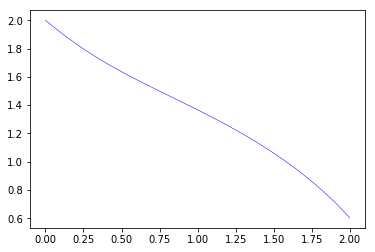

In [42]:
plt.pyplot.plot(x, y, c = 'b', linewidth = 0.5)
plt.pyplot.show()